In [193]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pandas_profiling import ProfileReport

In [194]:
## classification ml:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

In [195]:
## regression ml
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree.export import export_text
from sklearn.neighbors import KNeighborsRegressor

In [196]:
### evaluation
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [197]:
### optimize model
from sklearn.feature_selection import RFE

In [198]:
ds = pd.read_csv('./data/life_satisfaction_cleaned.csv', index_col=0)

# 1. Data Exploration

## 2.1. Descriptive Statistics

In [199]:
ds.head()

,PB030: PERSONAL ID,PB020: COUNTRY,PB010: YEAR OF THE SURVEY,PB140: YEAR OF BIRTH,PB150: SEX,PB190: MARITAL STATUS,PB200: CONSENSUAL UNION,PB220A: CITIZENSHIP,PE010: CURRENT EDUCATION ACTIVITY,PE040: HIGHEST ISCED LEVEL ATTAINED,...,PY120G: SICKNESS BENEFITS,PY130G: DISABILITY BENEFITS,PY140G: EDUCATION-RELATED ALLOWANCES,PD020: Replace worn-out clothes by some new (not second-hand) ones,PD030: Two pairs of properly fitting shoes,PD050: Get-together with friends/family (relatives) for a drink/meal at least once a month,PD060: Regularly participate in a leisure activity,PD070: Spend a small amount of money each week on yourself,PD080: Internet connection for personal use at home,PW010: OVERALL LIFE SATISFACTION
0,35601,DE,2013,1977,1,2.0,3,0,2,3.0,...,0.0,0.0,0.0,1.0,1.0,3.0,1.0,1.0,1.0,8.0
1,44701,DE,2013,1936,1,2.0,1,0,2,2.0,...,0.0,0.0,0.0,2.0,3.0,1.0,1.0,1.0,1.0,7.0
2,59901,DE,2013,1952,2,2.0,3,0,1,5.0,...,0.0,0.0,0.0,3.0,1.0,1.0,1.0,1.0,1.0,7.0
3,71101,DE,2013,1938,2,2.0,3,0,2,2.0,...,0.0,0.0,0.0,3.0,1.0,1.0,3.0,1.0,1.0,6.0
4,79501,DE,2013,1950,2,5.0,3,0,2,3.0,...,0.0,0.0,0.0,1.0,1.0,2.0,1.0,1.0,3.0,10.0


In [200]:
ds.columns

Index(['PB030: PERSONAL ID', 'PB020: COUNTRY', 'PB010: YEAR OF THE SURVEY',
       'PB140: YEAR OF BIRTH', 'PB150: SEX', 'PB190: MARITAL STATUS',
       'PB200: CONSENSUAL UNION', 'PB220A: CITIZENSHIP',
       'PE010: CURRENT EDUCATION ACTIVITY',
       'PE040: HIGHEST ISCED LEVEL ATTAINED',
       'PL031: SELF-DEFINED CURRENT ECONOMIC STATUS',
       'PL035: WORKED AT LEAST 1 HOUR DURING THE PREVIOUS WEEK',
       'PL051: OCCUPATION (ISCO-08 (COM))', 'PL150: MANAGERIAL POSITION',
       'PH010: GENERAL HEALTH',
       'PH020: SUFFER FROM ANY A CHRONIC (LONG-STANDING) ILLNESS OR CONDITION',
       'PH030: LIMITATION IN ACTIVITIES BECAUSE OF HEALTH PROBLEMS',
       'PH040: UNMET NEED FOR MEDICAL EXAMINATION OR TREATMENT',
       'PH060: UNMET NEED FOR DENTAL EXAMINATION OR TREATMENT',
       'PY010G_PY020G_PY021G_PY050G: EMPLOYEE INCOME',
       'PY035G: CONTRIBUTIONS TO INDIVIDUAL PRIVATE PENSION PLANS',
       'PY080G: PENSION FROM INDIVIDUAL PRIVATE PLANS',
       'PY090G++: SOCIAL 

In [201]:
ds.dtypes

PB030: PERSONAL ID                                                                              int64
PB020: COUNTRY                                                                                 object
PB010: YEAR OF THE SURVEY                                                                       int64
PB140: YEAR OF BIRTH                                                                            int64
PB150: SEX                                                                                      int64
PB190: MARITAL STATUS                                                                         float64
PB200: CONSENSUAL UNION                                                                         int64
PB220A: CITIZENSHIP                                                                             int64
PE010: CURRENT EDUCATION ACTIVITY                                                               int64
PE040: HIGHEST ISCED LEVEL ATTAINED                                               

In [202]:
# should i change float to int? at the moment i dont care if they are floats or int

In [203]:
#from pandas_profiling import ProfileReport

#profile = ProfileReport(ds, title='Pandas Profiling Report')

#profile.to_notebook_iframe()


##### conclusion
per column
- PB010 YEAR_of Survey: singel value, only needed, if i add more datas --> drop colum
- PB020 COUntry: same as with year--> drop column
- PB150_sex: almost equally balanced
- PH...healt: a lot of 8 = "dont know" --> test to drop them? or to change to other value?s


overall: 
- a lot of imbalanced data --> check later if balancing needed
- a lot of categorical data, but not all within the same range  --> try to use different scaler later
- some categorical data have a meaning (1-10), where 10 is better. other like "self defined curent status" / "occupation": no meaning
- a lot of skeewed datas, because either 0 or a value --> use other scaler?
- correlation --> pca/ica

In [204]:
ds1 = ds.drop('PB010: YEAR OF THE SURVEY', axis=1)

In [205]:
ds1 = ds.drop('PB020: COUNTRY', axis=1)

### 2.2. Correlation 

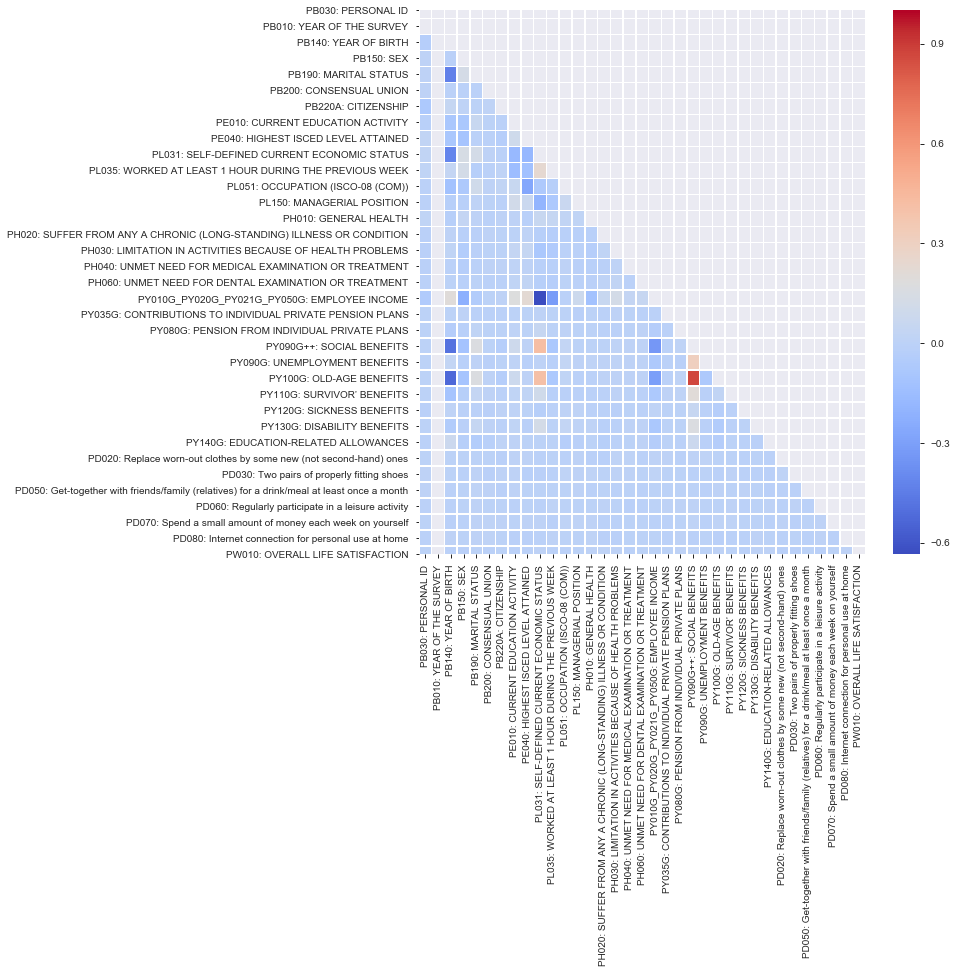

In [206]:
plt.figure(figsize =(10,10))
corr = ds.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
sns.heatmap(corr, cmap='coolwarm', annot = False, linewidth=0.5, mask=mask)

In [207]:
"""
Problems?
- income is negative correlated with employment status --> makes sense because unemployed have 0 income
- year of birth is correlated with old-age benefit --> makes sense, only old people get old age benefit
- since old age benefit is the biggest part of social benefit, there is also negative correlation between social benefits and 
- year of birth is correlated with martial status:-)
- social benefits is correlated with "individuals" of social benefits --> ok, because i only want to keep either on or the other -- see next section

Pro:
- 'PW010: OVERALL LIFE SATISFACTION' is not highly correlated with any of thefeatures, this means that we need a complex model to predict and cant only use one column for that
"""


'\nProblems?\n- income is negative correlated with employment status --> makes sense because unemployed have 0 income\n- year of birth is correlated with old-age benefit --> makes sense, only old people get old age benefit\n- since old age benefit is the biggest part of social benefit, there is also negative correlation between social benefits and \n- year of birth is correlated with martial status:-)\n- social benefits is correlated with "individuals" of social benefits --> ok, because i only want to keep either on or the other -- see next section\n\nPro:\n- \'PW010: OVERALL LIFE SATISFACTION\' is not highly correlated with any of thefeatures, this means that we need a complex model to predict and cant only use one column for that\n'

### 2.3 further preparation of the dataset

In [208]:
ds1.columns

Index(['PB030: PERSONAL ID', 'PB010: YEAR OF THE SURVEY',
       'PB140: YEAR OF BIRTH', 'PB150: SEX', 'PB190: MARITAL STATUS',
       'PB200: CONSENSUAL UNION', 'PB220A: CITIZENSHIP',
       'PE010: CURRENT EDUCATION ACTIVITY',
       'PE040: HIGHEST ISCED LEVEL ATTAINED',
       'PL031: SELF-DEFINED CURRENT ECONOMIC STATUS',
       'PL035: WORKED AT LEAST 1 HOUR DURING THE PREVIOUS WEEK',
       'PL051: OCCUPATION (ISCO-08 (COM))', 'PL150: MANAGERIAL POSITION',
       'PH010: GENERAL HEALTH',
       'PH020: SUFFER FROM ANY A CHRONIC (LONG-STANDING) ILLNESS OR CONDITION',
       'PH030: LIMITATION IN ACTIVITIES BECAUSE OF HEALTH PROBLEMS',
       'PH040: UNMET NEED FOR MEDICAL EXAMINATION OR TREATMENT',
       'PH060: UNMET NEED FOR DENTAL EXAMINATION OR TREATMENT',
       'PY010G_PY020G_PY021G_PY050G: EMPLOYEE INCOME',
       'PY035G: CONTRIBUTIONS TO INDIVIDUAL PRIVATE PENSION PLANS',
       'PY080G: PENSION FROM INDIVIDUAL PRIVATE PLANS',
       'PY090G++: SOCIAL BENEFITS', 'PY090G

In [209]:
### create booleans for categorical variables
create_dummy= ['PB150: SEX', 'PB190: MARITAL STATUS',
       'PB200: CONSENSUAL UNION', 'PB220A: CITIZENSHIP',
       'PE010: CURRENT EDUCATION ACTIVITY',
       'PL031: SELF-DEFINED CURRENT ECONOMIC STATUS',
       'PL035: WORKED AT LEAST 1 HOUR DURING THE PREVIOUS WEEK',
       'PL051: OCCUPATION (ISCO-08 (COM))', 'PL150: MANAGERIAL POSITION',
       'PH030: LIMITATION IN ACTIVITIES BECAUSE OF HEALTH PROBLEMS',
       'PH040: UNMET NEED FOR MEDICAL EXAMINATION OR TREATMENT',
       'PH060: UNMET NEED FOR DENTAL EXAMINATION OR TREATMENT',
       'PD020: Replace worn-out clothes by some new (not second-hand) ones',
       'PD030: Two pairs of properly fitting shoes',
       'PD050: Get-together with friends/family (relatives) for a drink/meal at least once a month',
       'PD060: Regularly participate in a leisure activity',
       'PD070: Spend a small amount of money each week on yourself',
       'PD080: Internet connection for personal use at home',
      ]


ds1 = pd.get_dummies(ds1, columns=create_dummy, drop_first=True)


In [210]:
## social benefits are in twice --> split into 2 datasets:

ds_1= ds1.drop(axis = 1, columns=['PY090G: UNEMPLOYMENT BENEFITS',
       'PY100G: OLD-AGE BENEFITS', 'PY110G: SURVIVOR’ BENEFITS',
       'PY120G: SICKNESS BENEFITS', 'PY130G: DISABILITY BENEFITS',
       'PY140G: EDUCATION-RELATED ALLOWANCES'])
ds_m = ds1.drop(axis = 1, columns=['PY090G++: SOCIAL BENEFITS'])

In [211]:
print(ds_m.shape)
print(ds_1.shape)

(19492, 97)
(19492, 92)


# Maschine Learning supervised

# 1. Regression

#### <font color=red>here decide to keep or drop nan: </font>

In [280]:
data = ds_1[ds_1['PW010: OVERALL LIFE SATISFACTION']>=0]
#data=ds_1

In [281]:
XCol=list(data.columns)
XCol.remove('PW010: OVERALL LIFE SATISFACTION')
YCol=['PW010: OVERALL LIFE SATISFACTION']

In [282]:
X = data[XCol]
y= data[YCol]

•	imbalance checking (undersampling, oversamplingML umbalanced data lib)

•	Split --> X_tr, y_tr, / X_ts,  y_ts

•	Try few models (with different algorithms) (<-- pipeline)

    –	Initialization

    –	Fit / predict

    –	Evaluation (overfitting / underfitting)

•	Choose best option based on requirements

•	Optimize the model

    –	Cross -validation

    –	Try few models (with same way to approach problem)

        o	Init

        o	Fit.(predict)

        o	Evaluation

    –	Hpyertuning


### 2.1 Test for imbalancing in Y

In [283]:
YCol

['PW010: OVERALL LIFE SATISFACTION']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021B2CB8A0C8>]],
      dtype=object)

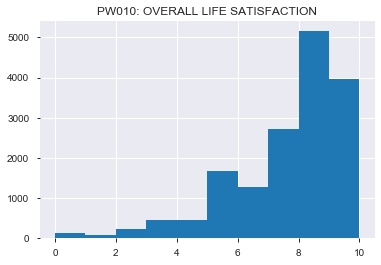

In [284]:
y.hist()

## it is very imbalanced  --> bin the values bellow 5 and change *dont know" to other value

In [285]:
#y.loc[(y['PW010: OVERALL LIFE SATISFACTION']==-1), 'PW010: OVERALL LIFE SATISFACTION']= X

#### <font color=red>here decide how to bin: </font>

In [291]:
y['bin'] =y['PW010: OVERALL LIFE SATISFACTION'].apply(lambda x: 4.5 if (x <=5) & (x!=-1) else x)
y['bin'] =y['bin'].apply(lambda x: 6.5 if ((x ==6) | (x==7)) else x)
y['bin'].unique()

C:\Users\haenni\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\haenni\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


array([ 8. ,  6.5, 10. ,  4.5,  9. ])

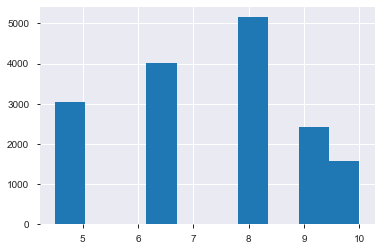

In [292]:
y['bin'].hist()


#### <font color=red>here decide to take binned y or not: </font>

In [293]:
ytogo=y['bin']
#ytogo=y['PW010: OVERALL LIFE SATISFACTION']


#### <font color=red>here decide to scale x or not: </font>

In [294]:
### scaler
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

### 2.2. split dataset

In [341]:
X_train, X_test, y_train, y_test = train_test_split(X, ytogo, test_size=0.3)

### 2.3 Try few models (with different algorithms) (<-- pipeline)

#### a) Prepare Model 

In [266]:
## prepare interaction term
for d in range(2):
    interaction = PolynomialFeatures(degree = d, include_bias = False, interaction_only = True)
    X_inter = interaction.fit_transform(X_train)

#### b)  Linear Regression Model

In [342]:

lm = LinearRegression()
model = lm.fit(X_train,y_train)

print("Intercept: ", lm.intercept_)
print("Coef: ", lm.coef_)

y_pred  = lm.predict(X_test)


Intercept:  7.333882812807578
Coef:  [-3.32590939e-04 -3.43474732e-01  7.94053049e-02 -1.97850956e-01
  1.92432977e-01 -3.12352513e-02 -1.24324223e-01 -1.86820894e-01
 -2.55505779e-01 -4.25818822e-01  2.22727236e-01  3.93420150e-01
 -5.83841239e-01  2.13443390e-01]


In [343]:
mean_squared_error(y_test, y_pred)

2.9280095277804725

In [345]:
r2_score(y_test, y_pred)

7.851529129976331e-05

#### c)  Taylor (pipeline)

In [346]:
#for k in range(1,8):
poly_model = make_pipeline (StandardScaler(), PolynomialFeatures(degree=2, include_bias = False, interaction_only = True), LinearRegression())

model = poly_model.fit(X_train, y_train)

    
print(poly_model.score(X_test, y_test))

y_pred  = poly_model.predict(X_test)


-1.6218780801684416e+24


In [347]:
mean_squared_error(y_test, y_pred)

4.7492473601714375e+24

In [348]:
r2_score(y_test, y_pred)

-1.6218780801684416e+24

#### c)  Regression Tree

In [349]:
regr = DecisionTreeRegressor(random_state = 29)

model = regr.fit(X_train, y_train)

y_pred  = regr.predict(X_test)
regr.score(X_test, y_test)

-0.0006616187898162984

In [350]:
r = export_text(regr, feature_names=list(X.columns))
#print(r)

In [351]:
mean_squared_error(y_test, y_pred)

2.9301768175872063

In [326]:
r2_score(y_test, y_pred)

-0.017124323243350448

In the rare cases you get a negative r squared value, you should probably rethink your regression analysis, especially if you are forcing an intercept.

#### d)  KNeighborsRegressor

In [352]:
knnr = KNeighborsRegressor(n_neighbors = 3)

model = knnr.fit(X_train, y_train)  #fit the model
y_pred = knnr.predict(X_test)


In [353]:
mean_squared_error(y_test, y_pred)

3.383062302730891

In [354]:
r2_score(y_test, y_pred)

-0.15532297573258824

#### <font color=red>huge means squared_error and negative r squared for binned and unbinned y
     also failed with drop nan, but way better!
    also failed with feature elimination

</font>

# 2.2 optimize recursive feature elimination (RFE)

In [ ]:
## recursive feature elimination.
# initialize an RFE model using the `auto_model` linear regression model. Set `n_features_to_select=3`

Fit the model and print the ranking

In [355]:
# Your code here:
auto_model = LinearRegression()
selector = RFE(auto_model, 5, step=1)
model = selector.fit(X_train,y_train)

In [356]:
# Your code here:
selector.ranking_
#selector.support_

array([10,  1,  8,  5,  4,  9,  7,  6,  1,  1,  2,  1,  1,  3])

In [357]:
columns=[]
for x in range(len(X.columns)):
    if selector.ranking_[x]<=10:
        columns.append(X.columns[x])
print(len(columns))
columns

14


['PB220A: CITIZENSHIP_1',
 'PL031: SELF-DEFINED CURRENT ECONOMIC STATUS_4.0',
 'PL031: SELF-DEFINED CURRENT ECONOMIC STATUS_11.0',
 'PL051: OCCUPATION (ISCO-08 (COM))_12.0',
 'PL051: OCCUPATION (ISCO-08 (COM))_14.0',
 'PL051: OCCUPATION (ISCO-08 (COM))_22.0',
 'PL051: OCCUPATION (ISCO-08 (COM))_26.0',
 'PL051: OCCUPATION (ISCO-08 (COM))_54.0',
 'PL051: OCCUPATION (ISCO-08 (COM))_72.0',
 'PL051: OCCUPATION (ISCO-08 (COM))_73.0',
 'PL051: OCCUPATION (ISCO-08 (COM))_75.0',
 'PL051: OCCUPATION (ISCO-08 (COM))_82.0',
 'PL051: OCCUPATION (ISCO-08 (COM))_92.0',
 'PL051: OCCUPATION (ISCO-08 (COM))_96.0']

In [338]:
X=data[columns]

## --> run above again

## 1. Classification

## 2.1 first try

### 2.1.1 prepare data

In [392]:
# change outcome variable to a 2 classification variable:
# drop 99
# based on ds_1
data = ds_1

data =data[data['PW010: OVERALL LIFE SATISFACTION']!=-1]
data.shape
ds_1.shape[0]-data.shape[0]

3301

In [394]:
data['Y_class']= data['PW010: OVERALL LIFE SATISFACTION'].apply(lambda x: 1 if x>=8 else 0)

C:\Users\haenni\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


1    9130
0    7061
Name: Y_class, dtype: int64

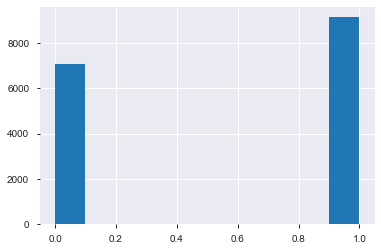

In [395]:
data['Y_class'].hist()
data['Y_class'].value_counts()
## --> balanced more or less

In [396]:
XCol=data.columns[:-2]
YCol=data.columns[-1]

print(len(XCol))
print(YCol)

91
Y_class


In [412]:
X = data[XCol]
y= data[YCol]

(16191,)

In [398]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
X_train.shape
X_test.shape


(4858, 91)

#### a) Logistic Regression

In [399]:
lr = LogisticRegression()
lr.fit(X_train,y_train)


y_pred=lr.predict(X_test)

C:\Users\haenni\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [400]:
acc = lr.score(X_test,y_test)
acc

0.5586661177439275

In [417]:
conf=confusion_matrix(y_test, y_pred)

print( "accuracy: "  + str(round((conf[1,1]+conf[0,0])/ conf.sum()*100,2)))
print( "precision: " +str(round((conf[0,0])/ (conf[1,0]+conf[0,0])*100,2)))

conf

tn,fp,fn,tp = confusion_matrix(y_test, y_pred).flatten()
### it predicts all as 1...

accuracy: 55.87
precision: nan


C:\Users\haenni\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in longlong_scalars
  after removing the cwd from sys.path.


0

#### b) DecisionTree Classify

In [419]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)

In [420]:
acc = dtc.score(X_test, y_test)*100
print(f"Decision Tree Test Accuracy {round(acc, 2)}%")

Decision Tree Test Accuracy 100.0%


In [421]:
conf=confusion_matrix(y_test, y_pred)

print( "accuracy: "  + str(round((conf[1,1]+conf[0,0])/ conf.sum()*100,2)))
print( "precision: " +str(round((conf[0,0])/ (conf[1,0]+conf[0,0])*100,2)))

conf

accuracy: 100.0
precision: 100.0


array([[2144,    0],
       [   0, 2714]], dtype=int64)

In [ ]:
## overfitting!!!

#### c) Support Vector Maschine

In [375]:
svm = SVC()
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

C:\Users\haenni\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [376]:
acc = svm.score(X_test,y_test)*100
print(f"SVM Algorithm Test Accuracy {round(acc, 2)}%")

SVM Algorithm Test Accuracy 57.39%


In [377]:
conf=confusion_matrix(y_test, y_pred)

print( "accuracy: "  + str(round((conf[1,1]+conf[0,0])/ conf.sum()*100,2)))
print( "precision: " +str(round((conf[0,0])/ (conf[1,0]+conf[0,0])*100,2)))

accuracy: 57.39
precision: nan


C:\Users\haenni\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in longlong_scalars
  after removing the cwd from sys.path.


#### d) K-Nearest Neighbour

In [378]:
knn = KNeighborsClassifier(n_neighbors = 2)  # n_neighbors means k
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [379]:
acc = knn.score(X_test, y_test)*100
acc

47.61218608480856

In [ ]:
conf=confusion_matrix(y_test, y_pred)

print( "accuracy: "  + str(round((conf[1,1]+conf[0,0])/ conf.sum()*100,2)))
print( "precision: " +str(round((conf[0,0])/ (conf[1,0]+conf[0,0])*100,2)))


Sammelsurium zum optimieren:
- dummies für social benefits einzelne
- die einzelnen social benefits brauchen
- log from y!